# Assignment 1: Classification Neural Network model with IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Model definition**

## Model 1 (Base Model)

Building neural network model 1 with one hidden layer and Considering 32 untis and, batch_size of 512 with 100 epochs. 

and used early stopping to stop optimization when model isn't improving any more.

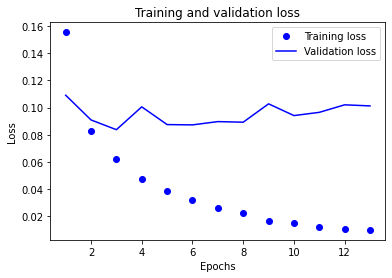

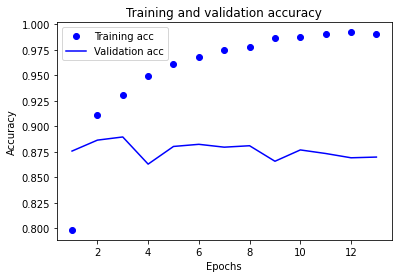

In [75]:
# Building neural network model without regularization.
# Considering 32 untis and batch_size of 256 with 100 epochs.

from tensorflow import keras
from tensorflow.keras import layers

# Import EarlyStopping
from keras.callbacks import EarlyStopping

n_cols = partial_x_train.shape[1]

model_1 = keras.Sequential([
    layers.Dense(32, activation="tanh", input_shape = (n_cols,)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Early stopping: Optimizing the optimization
# Define early_stopping_monitor
# used early stopping to stop optimization when it isn't helping any more. 
# Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in your call to .fit()
early_stopping_monitor = EarlyStopping(patience=10)

# Training your model
history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_monitor], verbose=False)

# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history_1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

It is clear from the plot that the model accuracy is more in training data set than in validation data set. Hence the model is "overfit".


## Model 2 (with regularization("L2 form") and dropout(50%))

Building neural network model 2  with one hidden layer with regularization("L2 form") and dropout(50%) and Considering 64 untis and, batch_size of 256 with 100 epochs.

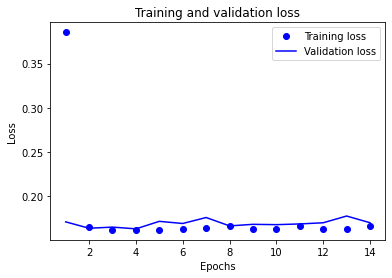

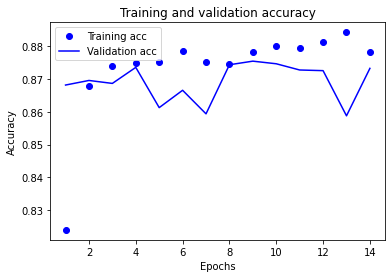

In [ ]:
# It is clear from the plot that the model accuracy is more in training data set than in validation data set. Hence the model is "overfit".
# By using Brute force method for units and batch_size, we observed values of 64,256 resp. tend to overfit. Hence model need to be tuned further. 

# Importing regularizers from keras package
from keras import regularizers

# Building neural network model with regularization("L2 form") and dropout(20%) methods.
model_2 = keras.Sequential([
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(l=0.01), input_shape = (n_cols,)),
    layers.Dropout(rate=0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_2.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

# Early stopping: Optimizing the optimization
# Define early_stopping_monitor
# used early stopping to stop optimization when it isn't helping any more. 
# Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in your call to .fit()
early_stopping_monitor = EarlyStopping(patience=10)

# Training your model
history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_monitor], verbose=False)

# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history_2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots, the model seems to perform well both losses & accuracy.

## Model 3 (with 3 dense layers with regularization("L1 form") and dropout(50%) methods.)

Building neural network model with 3 dense layers with regularization("L1 form") and dropout(50%) methods.

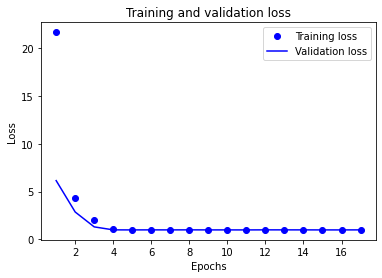

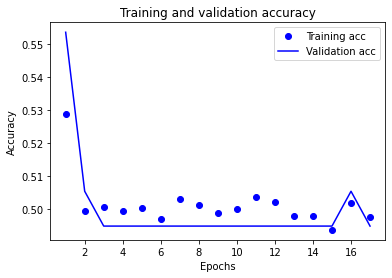

In [69]:
# Adding more hidden layers to the model


# Building neural network model with 3 dense layers with regularization("L1 form") and dropout(50%) methods.
model_3 = keras.Sequential([
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l1(l=0.01), input_shape = (n_cols,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l1(l=0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l1(l=0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

# Early stopping: Optimizing the optimization
# Define early_stopping_monitor
# used early stopping to stop optimization when it isn't helping any more. 
# Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in your call to .fit()
early_stopping_monitor = EarlyStopping(patience=6)

# Training your model
history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_monitor], verbose=False)


# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history_3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots, the model seems to perform well with validation loss but accuracy is poorly effected with both training and validation.

## Model 4 (with 3 dense layers with regularization("L2 form") and dropout(40%) methods.)

Building neural network model with 3 dense layers with regularization("L2 form") and dropout(40%) methods.

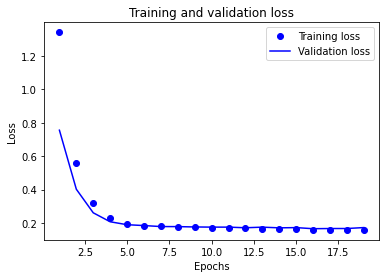

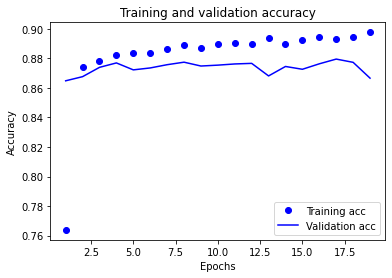

In [70]:
# From the above plot, the model seems to perform well.
# Adding more hidden layers to the model


# Building neural network model with 3 dense layers with regularization("L2 form") and dropout(50%) methods.
model_4 = keras.Sequential([
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01), input_shape = (n_cols,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

# Early stopping: Optimizing the optimization
# Define early_stopping_monitor
# used early stopping to stop optimization when it isn't helping any more. 
# Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in your call to .fit()
early_stopping_monitor = EarlyStopping(patience=3)

# Training your model
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_monitor], verbose=False)


# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history_4.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots, the model seems to perform well both losses & accuracy.

So for further analysis will focus mainly on L1 & L2 regularization models


**Plotting Validation loss by comparing  L1 & L2 regularization models**

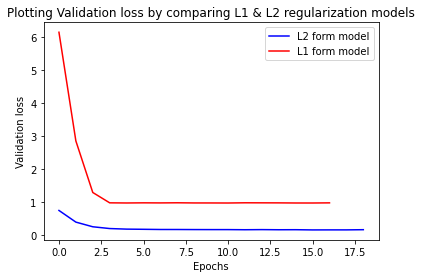

In [73]:
# Create the plot
plt.plot(history_4.history['val_loss'] ,  'b', label='L2 form model')
plt.plot(history_3.history['val_loss'] , 'r', label='L1 form model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title("Plotting Validation loss by comparing L1 & L2 regularization models")
plt.legend()
plt.show()

From Above plot we can clearly see that L2 regulariztion neural network model has very low validation loss when compare to L2 regulariztion neural network model

**Plotting Validation Accuracy by comparing  L1 & L2 regularization models**

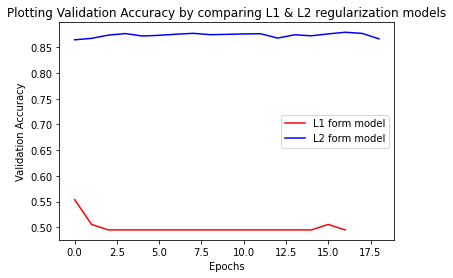

In [74]:
# Create the plot
plt.plot(history_3.history['val_accuracy'] , 'r', label='L1 form model')
plt.plot(history_4.history['val_accuracy'] ,  'b', label='L2 form model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Plotting Validation Accuracy by comparing L1 & L2 regularization models")
plt.legend()
plt.show()

From Above plot we can clearly see that L2 regularization neural network model has high validation accuracy when compare to L2 regulariztion neural network model

**To Summarize from all the models above:**

1) Regularized models seem to be effective since they add a penalty to the model and generalize well with validation data. 

2) The L2 regularization neural network model performs better at minimizing validation loss and increasing validation accuracy than the L1 reg model. 

3) So choosing the L2 regularization neural network model is my best model. 

4) Used early stopping to stop optimization when the model isn't improving any more. and choosing an epoch value of 8 (from the L2 Reg model) since its validation started peaking at the 8th epoch. 

5) Observed that units with 32 or 64 units tend to perform well. 

6) Batch size 256 seems to be effective when compared to the 512 batch size, for this IMDB dataset. 

7)  Adam optimizer seems to be more effective than rmsprop, Because Adam does everything that RMSProp does to solve the denominator decay problem of AdaGrad. In addition to that, the Adam optimizer uses a cumulative history of gradients.

*The network begins to overfit after Eight epochs. Let’s train a new network from
scratch for Eight epochs and then evaluate it on the test set.*


**Retraining a model from scratch**

In [98]:
# Building neural network model with 3 dense layers with regularization("L2 form") and dropout(50%) methods.
model_5 = keras.Sequential([
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01), input_shape = (n_cols,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(64, activation="tanh",kernel_regularizer = regularizers.l2(0.01)),
    layers.Dropout(rate=0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_5.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

# Training your model
model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=256,
                    validation_data=(x_val, y_val))
results = model_5.evaluate(x_test, y_test)

Epoch 1/8
59/59 [==============================] - 3s 46ms/step - loss: 1.3393 - accuracy: 0.7594 - val_loss: 0.7493 - val_accuracy: 0.8686
Epoch 2/8
59/59 [==============================] - 2s 37ms/step - loss: 0.5560 - accuracy: 0.8727 - val_loss: 0.4013 - val_accuracy: 0.8754
Epoch 3/8
59/59 [==============================] - 2s 37ms/step - loss: 0.3225 - accuracy: 0.8821 - val_loss: 0.2637 - val_accuracy: 0.8725
Epoch 4/8
59/59 [==============================] - 2s 37ms/step - loss: 0.2304 - accuracy: 0.8823 - val_loss: 0.2088 - val_accuracy: 0.8749
Epoch 5/8
59/59 [==============================] - 2s 37ms/step - loss: 0.1969 - accuracy: 0.8860 - val_loss: 0.1907 - val_accuracy: 0.8773
Epoch 6/8
59/59 [==============================] - 2s 37ms/step - loss: 0.1837 - accuracy: 0.8836 - val_loss: 0.1833 - val_accuracy: 0.8780
Epoch 7/8
59/59 [==============================] - 2s 38ms/step - loss: 0.1798 - accuracy: 0.8856 - val_loss: 0.1834 - val_accuracy: 0.8696
Epoch 8/8
782/782 [=

In [99]:
results
print('Test score:', results[0])
print('Test accuracy:', results[1])

Test score: 0.18259474635124207
Test accuracy: 0.8673200011253357


In [101]:
# Model_5 summary
model_5.summary()


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 64)                640064    
                                                                 
 dropout_71 (Dropout)        (None, 64)                0         
                                                                 
 dense_117 (Dense)           (None, 64)                4160      
                                                                 
 dropout_72 (Dropout)        (None, 64)                0         
                                                                 
 dense_118 (Dense)           (None, 64)                4160      
                                                                 
 dropout_73 (Dropout)        (None, 64)                0         
                                                                 
 dense_119 (Dense)           (None, 1)               

 * We can clearly see the output shape. It's an hyperparamter, number units provided at each dense layer.

 * The “Param #” column shows you the number of parameters that are trained for each layer.

 * At first layer we have 640064 parameters, Applying formula, we can calculate the number of parameters for the Dense layers.

  **param_number = output_channel_number * (input_channel_number + 1) = 64 * (10000+1) = 640064**

 * then subsequent 2nd and 3rd layers we have 4160 parameters each.

 * The total number of parameters is shown at the end, which is equal to the number of trainable and non-trainable parameters. In this model, all the layers are trainable, which is 648,449.

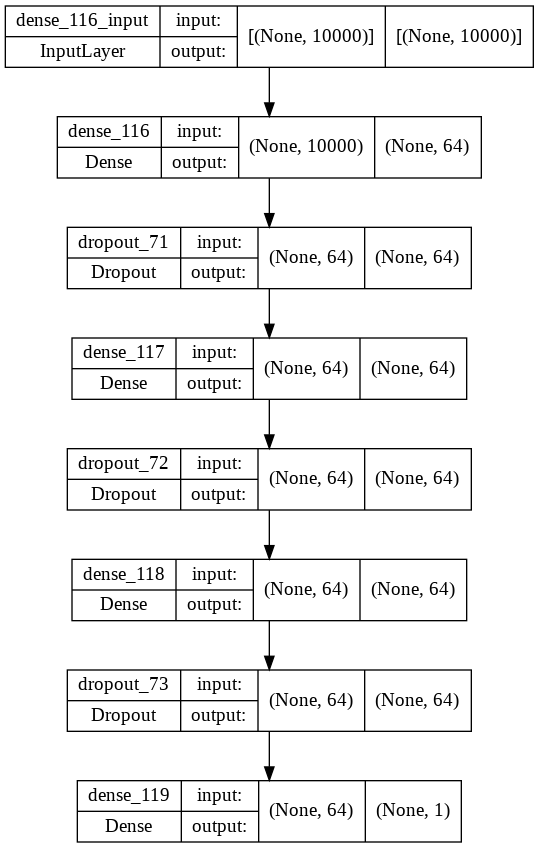

In [106]:
# plot of the network neural network graph
from keras.utils.vis_utils import plot_model
from keras import models 
from keras_visualizer import visualizer 
plot_model(model_5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### Using a trained model to generate predictions on new data

In [86]:
model_5.predict(x_test)

array([[0.45265344],
       [0.97518873],
       [0.78528947],
       ...,
       [0.19825703],
       [0.22681499],
       [0.5089443 ]], dtype=float32)